# Section of region of interest

In [31]:
from pathlib import Path
from ipyfilechooser import FileChooser
fc = FileChooser('/run/user/1000/gvfs/smb-share:server=cephfs2,share=users/acourtney/HCR_Octopus_Jerome/Febuary2024/')
display(fc)

FileChooser(path='/run/user/1000/gvfs/smb-share:server=cephfs2,share=users/acourtney/HCR_Octopus_Jerome/Febuar…

In [54]:
path = Path(fc.selected)
folder = path.parent
destdir = Path('./')
#destdir = folder
filename = path.name
def check_path(p):
    if p.exists():
        print(f'File {p.name} is  accessible')
    else:
        print(f'File {p.name} is not accessible')
    
check_path(folder / filename)

File 14Aug2023_3b_Slices_F1_Stitched_Cropped_ForAnalysis.ims is  accessible


In [39]:
from imaris_ims_file_reader.ims import ims
import zarr
import dask.array as da

resolution_level = 3 

store = ims(folder / filename, ResolutionLevelLock=resolution_level, aszarr=True)

img = da.from_zarr(store)
nuclei = da.max(img[0,3],0).compute().squeeze()

Opening readonly file: /run/user/1000/gvfs/smb-share:server=cephfs2,share=users/acourtney/HCR_Octopus_Jerome/Febuary2024/14Aug2023_3b_Slices_F1_Stitched_Cropped_ForAnalysis.ims 

GET : .zarray
GET : 0.3.0.0.0
[(0, 1), (3, 4), (0, 32), (0, 128), (0, 128)]
GET : 0.3.1.0.0
[(0, 1), (3, 4), (32, 45), (0, 128), (0, 128)]
GET : 0.3.0.0.1
[(0, 1), (3, 4), (0, 32), (0, 128), (128, 256)]
GET : 0.3.1.0.1
[(0, 1), (3, 4), (32, 45), (0, 128), (128, 256)]
GET : 0.3.0.0.2
[(0, 1), (3, 4), (0, 32), (0, 128), (256, 269)]
GET : 0.3.1.0.2
[(0, 1), (3, 4), (32, 45), (0, 128), (256, 269)]
GET : 0.3.0.1.0
[(0, 1), (3, 4), (0, 32), (128, 256), (0, 128)]
GET : 0.3.1.1.0
[(0, 1), (3, 4), (32, 45), (128, 256), (0, 128)]
GET : 0.3.0.1.1
[(0, 1), (3, 4), (0, 32), (128, 256), (128, 256)]
GET : 0.3.1.1.1
[(0, 1), (3, 4), (32, 45), (128, 256), (128, 256)]
GET : 0.3.0.1.2
[(0, 1), (3, 4), (0, 32), (128, 256), (256, 269)]
GET : 0.3.1.1.2
[(0, 1), (3, 4), (32, 45), (128, 256), (256, 269)]
(1, 1, 32, 128, 128)
True
GET

In [40]:
import napari
v = napari.view_image(nuclei)

Add regions of interest in napari

In [43]:
s = v.layers[-1]


Export the region

In [61]:
import pandas as pd

poly = pd.concat([pd.DataFrame({
    'y':resolution_level * p[:,0],
    'x':resolution_level * p[:,1],
    'roi':[k]*p.shape[0]}) 
    for k,p in enumerate(v.layers[-1].data)])

poly.to_csv(destdir/'regions.csv',index=False)
poly.head()

,y,x,roi
0,63.038301,111.583118,0
1,122.150338,183.831163,0
2,234.091973,218.099011,0
3,312.051326,230.949454,0
4,386.012763,233.233977,0


In [63]:
poly = pd.read_csv(destdir/'regions.csv')

In [68]:
sdata = [np.stack((g['y'],g['x']),1) for n,g in poly.groupby('roi')]
rois = napari.layers.Shapes(sdata,shape_type='polygon').to_labels()

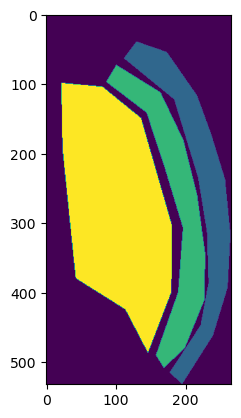

In [71]:
import matplotlib.pyplot as plt
plt.imshow(rois)

In [ ]:
rois = s.to_labels()

In [21]:
tmp = np.load('tmp.npz')

In [24]:
with np.load('tmp.npz') as data:
    a = data['']

KeyError: 'a is not a file in the archive'